In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px

In [2]:
df = pd.read_csv('airbnb_listings.csv')

## The map helps we find houses in the area like. We can search for houses based on things like location.


In [3]:

fig = px.scatter_mapbox(
    df,
    lat="latitude",
    lon="longitude",
    hover_data=["id"],
    zoom=6,
)

# Update the map layout
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Show the map
fig.show()


In [4]:
a1 = df.shape
a1

(7566, 75)

In [5]:

df['review_scores_rating'].isnull().sum()


1357

## Handling missing valeus and filled with ffill method.

In [6]:
df.fillna(method='ffill', inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8616\3970806690.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [7]:
df.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20220911231053,2022-09-12,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,...,4.93,4.66,4.82,NaN,f,2,0,2,0,1.85
1,85156,https://www.airbnb.com/rooms/85156,20220911231053,2022-09-12,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,...,4.88,4.64,4.78,NaN,f,2,0,2,0,1.53


## We made boxplots, to look at how guests rate different things like overall experience, accuracy, cleanliness, and more. We organized the charts to see if there's a difference between hosts who are Superhosts and those who aren't. In the chart, it's clear that Superhosts generally receive higher reviews compared to non-Superhosts. This suggests that being a Superhost is associated with better guest satisfaction.

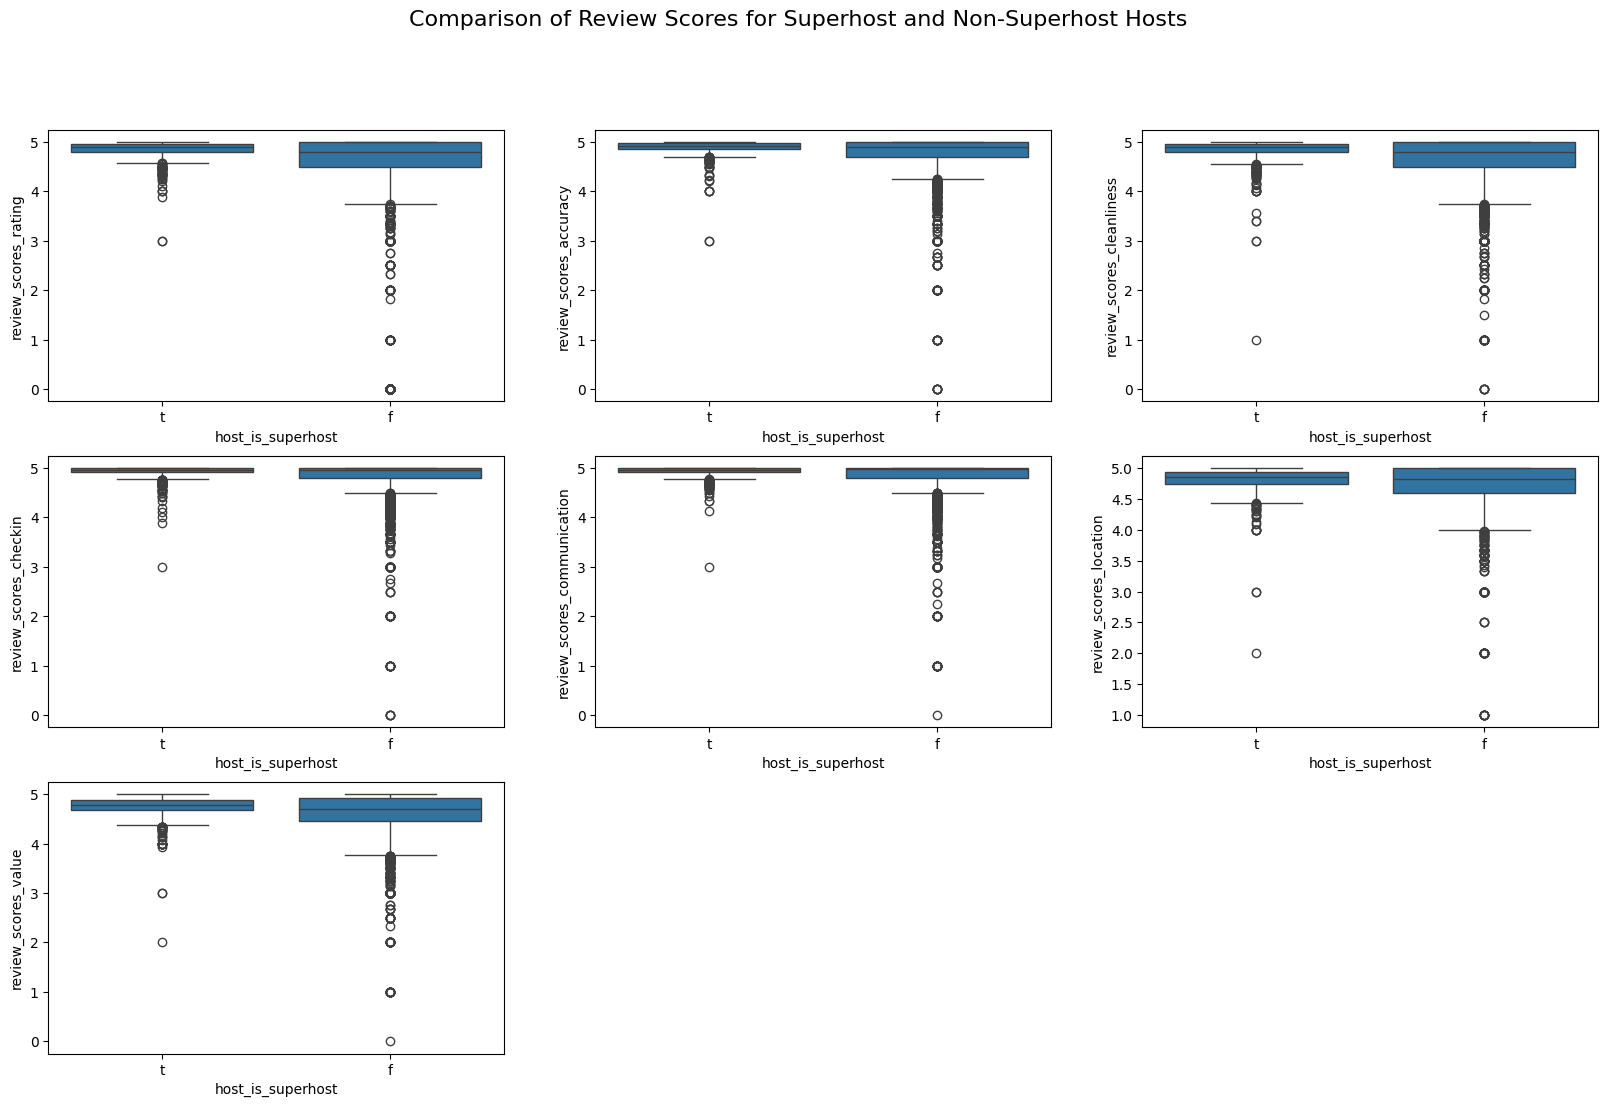

In [8]:
VariablesOfInterest = df [['review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]
fig = plt.figure(figsize=(20,12))
fig.suptitle('Comparison of Review Scores for Superhost and Non-Superhost Hosts', fontsize=16)


count = 0

for variable in VariablesOfInterest:
    
    count += 1
    
    plt.subplot(3, 3, count)
    
    ax = sns.boxplot(x='host_is_superhost', y = variable, data = df)  


plt.show()


## We displayed the mean review points for Superhosts and non-Superhosts. This helps us see the average satisfaction level for both types of hosts.


In [9]:
for a in VariablesOfInterest:

    superhost_rate = df.groupby('host_is_superhost')[[a]].mean()

    print(superhost_rate)

                   review_scores_rating
host_is_superhost                      
f                              4.570818
t                              4.854954
                   review_scores_accuracy
host_is_superhost                        
f                                 4.76081
t                                 4.89045
                   review_scores_cleanliness
host_is_superhost                           
f                                   4.613567
t                                   4.837677
                   review_scores_checkin
host_is_superhost                       
f                               4.815274
t                               4.925834
                   review_scores_communication
host_is_superhost                             
f                                     4.827364
t                                     4.931054
                   review_scores_location
host_is_superhost                        
f                                4.721087
t             

## We converted the 'Price' column from object type to a numerical format. This change allows us to create charts and analyze the numerical aspects of the price data more effectively.


In [10]:
df['price'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 7566 entries, 0 to 7565
Series name: price
Non-Null Count  Dtype 
--------------  ----- 
7566 non-null   object
dtypes: object(1)
memory usage: 59.2+ KB


In [11]:

df['price'] = pd.to_numeric(df['price'].replace('[\$,]', '', regex=True), errors='coerce')


Text(0.5, 1.0, 'Boxplot of Prices')

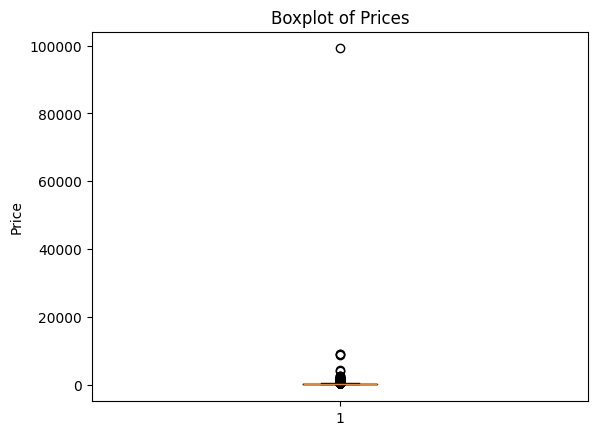

In [12]:
plt.boxplot(df['price'])
plt.ylabel('Price')
plt.title('Boxplot of Prices')

We removed more than 4000 houses from the dataset because they were considered outliers. 

Text(0.5, 1.0, 'Boxplot of Prices')

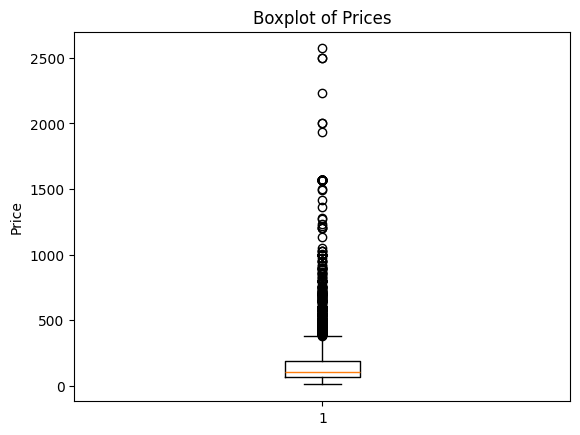

In [13]:
df = df[df['price'] < 4000]
plt.boxplot(df['price'])
plt.ylabel('Price')
plt.title('Boxplot of Prices')

## We created scatter plots to compare review scores with the price of houses. Based on the chart, it seems that as the price increases, the satisfaction level of people also tends to increase. This suggests a positive relationship between price and satisfaction.

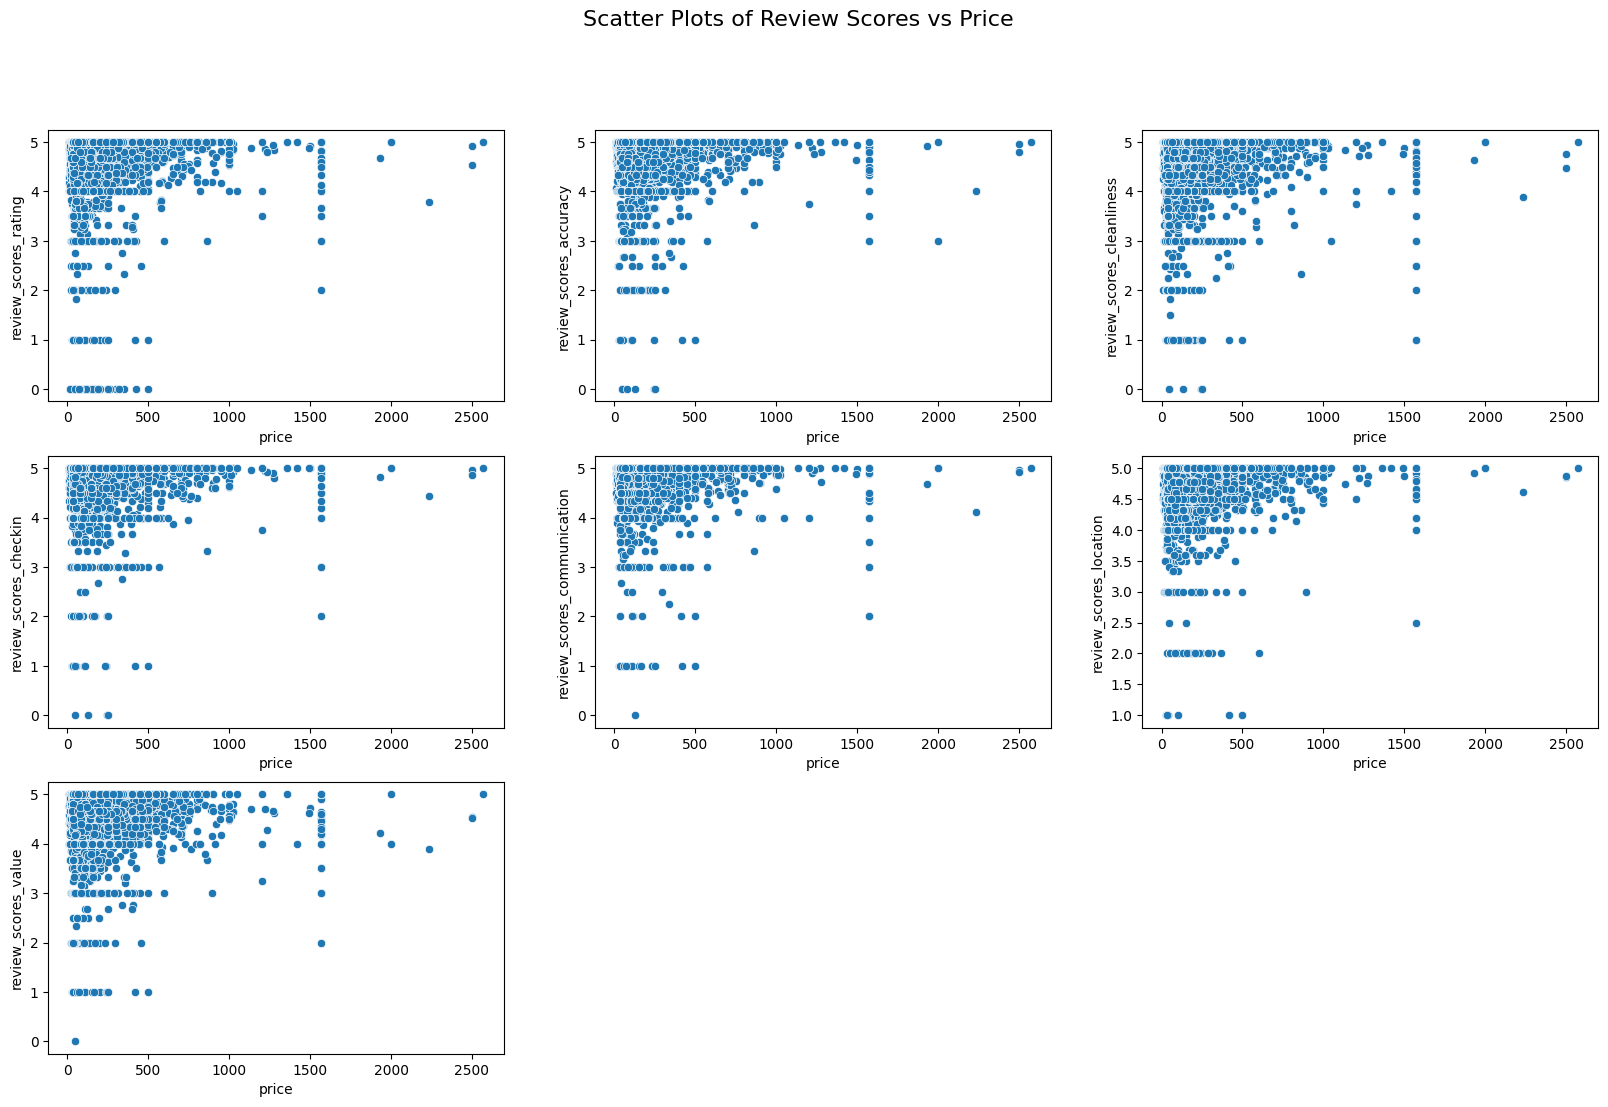

In [14]:
fig = plt.figure(figsize=(20,12))
fig.suptitle('Scatter Plots of Review Scores vs Price', fontsize=16)



count = 0

for variable in VariablesOfInterest:
    
    count += 1
    
    plt.subplot(3, 3, count)
    
    ax = sns.scatterplot(x='price', y = variable, data = df)  

plt.show()


We made a bar plot to analyze host response times. The majority of hosts responded within an hour.

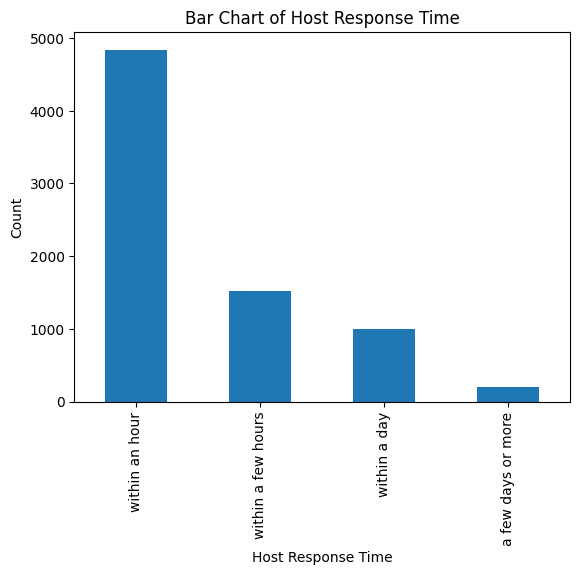

In [15]:
df['host_response_time'].value_counts().plot(kind='bar')

plt.xlabel('Host Response Time')
plt.ylabel('Count')
plt.title('Bar Chart of Host Response Time')

plt.show()

We used a bar plot to show different room types. The results showed that 'Entire home' and 'Private room' were nearly the same and quite high. 

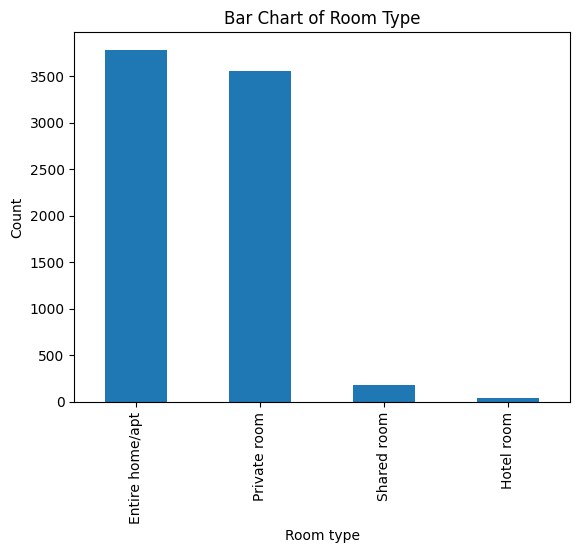

In [16]:

df['room_type'].value_counts().plot(kind='bar')

plt.xlabel('Room type')
plt.ylabel('Count')
plt.title('Bar Chart of Room Type')

plt.show()